<a href="https://colab.research.google.com/github/keepitsimplegithub/Phishing-Websites-Detection/blob/main/Phishing_Websites_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
These data consist of a collection of legitimate as well as phishing website instances. Each website is represented by the set of features which denote, whether website is legitimate or not. Data can serve as an input for machine learning process.

# Problem Statement:
Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic than it is to break through a computer's protection measures.

The mail goal is to predict whether the domains are real or malicious.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:
data = pd.read_csv('dataset_small.csv')
data.drop_duplicates(inplace=True) # Drop Duplicate Data

data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [ ]:
data.tls_ssl_certificate.unique()

array([0, 1])

In [ ]:
data["asn_ip"].unique()

array([  8560, 263283,  26496, ..., 135262,  35818,  29024])

# Data Visualization

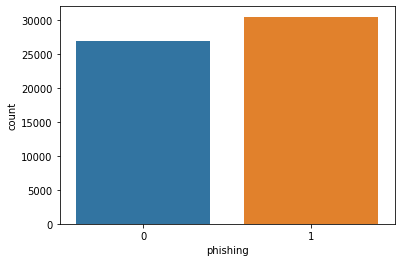

In [ ]:
sns.countplot(data=data, x='phishing')
plt.show()

In [ ]:
print("1 :", data.phishing.sum())
print("0 :", data.shape[0]-data.phishing.sum())

1 : 30497
0 : 26908


In [ ]:
X = data.drop(columns=["phishing"])
y = data.phishing

# Feature Selection

Dropping Constant Features

Removing Highly Correlated Features

# 1. Dropping constant features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit(X)

print("Total Columns :",len(var.get_support()))
print("Columns Dropped :",len(var.get_support()) - sum(var.get_support()))

X_new = X[X.columns[var.get_support()]]

print("Columns Left :",len(X_new.columns))

Total Columns : 111
Columns Dropped : 13
Columns Left : 98


# 2. Drop Highly Correlated Features

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr


In [ ]:
corr_features = correlation(X, .6)
sum(var.get_support()) - len(corr_features)
X_new = X.drop(corr_features, axis=1)

In [ ]:
print("Number of Column Dropped", len(X.columns) - len(X_new.columns) )

X = X_new
print("Columns Left :",len(X_new.columns))

Number of Column Dropped 55
Columns Left : 56


# 3. Mutual Information
The Mutual Information between two random variables measures how much information can be obtained from a random variable by observing another random variable.from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_selection import mutual_info_classif


In [ ]:
a = mutual_info_classif(X,y)


In [ ]:
a.shape

(56,)

In [ ]:
a

array([3.41682140e-02, 4.11524191e-02, 2.58381794e-02, 2.91576928e-01,
       5.90725389e-03, 4.35432801e-02, 2.00039187e-02, 3.42975725e-03,
       1.02084918e-03, 4.60699622e-03, 2.34947285e-03, 5.59649486e-04,
       0.00000000e+00, 7.94565111e-04, 0.00000000e+00, 8.38774277e-03,
       3.25118245e-02, 5.80476274e-02, 6.10723265e-03, 9.11723914e-04,
       0.00000000e+00, 4.63030662e-04, 4.87593299e-03, 0.00000000e+00,
       4.57480638e-04, 1.29588630e-03, 1.26262228e-03, 0.00000000e+00,
       0.00000000e+00, 2.18778106e-04, 0.00000000e+00, 2.78333258e-03,
       0.00000000e+00, 1.53033720e-03, 1.88589695e-02, 2.19917484e-03,
       3.16421771e-04, 2.53918184e-01, 2.27446347e-01, 5.72744139e-02,
       5.32546197e-02, 5.49137629e-02, 1.99067066e-02, 1.39852077e-02,
       1.97215982e-01, 1.99629634e-01, 6.02149831e-02, 2.99566099e-02,
       2.10572407e-02, 1.34971931e-02, 8.20468303e-02, 2.25167577e-03,
       2.11394480e-02, 3.20032963e-03, 0.00000000e+00, 2.39739077e-03])

In [ ]:
mutual_info = pd.Series(a)
mutual_info.index = X.columns
mutual_info = mutual_info.sort_values(ascending=False)


In [ ]:
mutual_info

qty_slash_url              0.291577
qty_dot_directory          0.253918
qty_underline_directory    0.227446
time_domain_activation     0.199630
asn_ip                     0.197216
ttl_hostname               0.082047
time_domain_expiration     0.060215
qty_dot_domain             0.058048
qty_hyphen_params          0.057274
qty_percent_params         0.054914
qty_slash_params           0.053255
qty_equal_url              0.043543
qty_hyphen_url             0.041152
qty_dot_url                0.034168
qty_tld_url                0.032512
qty_ip_resolved            0.029957
qty_underline_url          0.025838
qty_redirects              0.021139
qty_nameservers            0.021057
qty_at_url                 0.020004
time_response              0.019907
qty_vowels_domain          0.018859
domain_spf                 0.013985
qty_mx_servers             0.013497
qty_percent_url            0.008388
qty_hyphen_domain          0.006107
qty_questionmark_url       0.005907
qty_equal_domain           0

In [ ]:
mutual_info = mutual_info[mutual_info > 0]

In [ ]:
len(mutual_info)

47

In [ ]:
X = X[mutual_info.index]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training with Random Forest Classifier
**Hyperparameter Tuning**

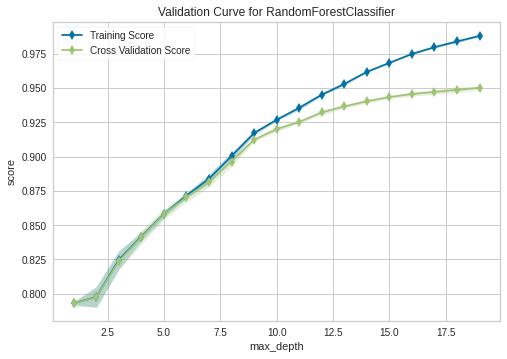

In [ ]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestClassifier

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

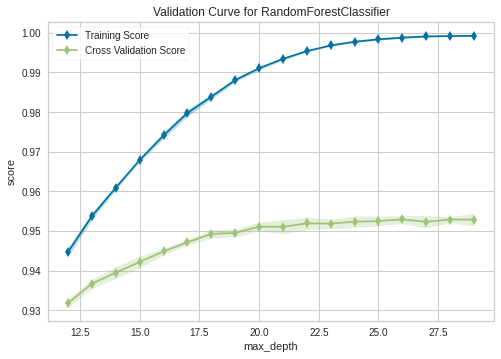

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(12, 30), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()


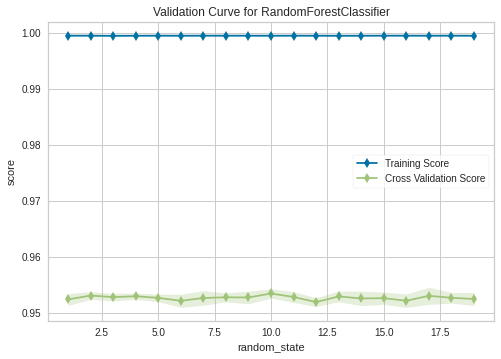

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

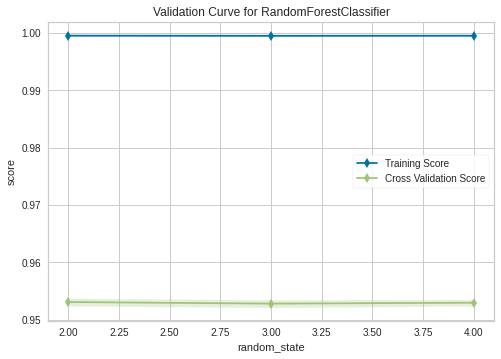

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(2, 5), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

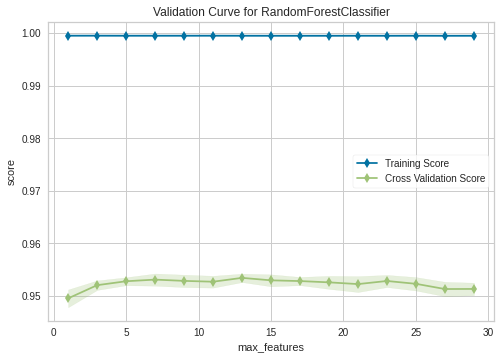

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_features",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()


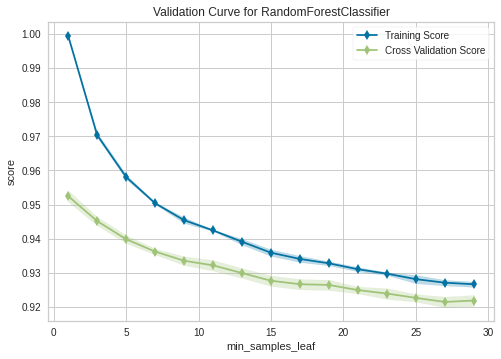

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_leaf",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

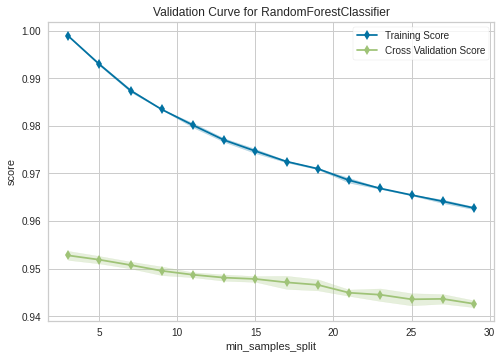

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_split",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()


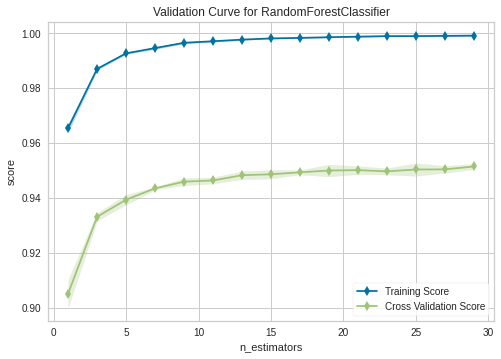

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_estimators",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

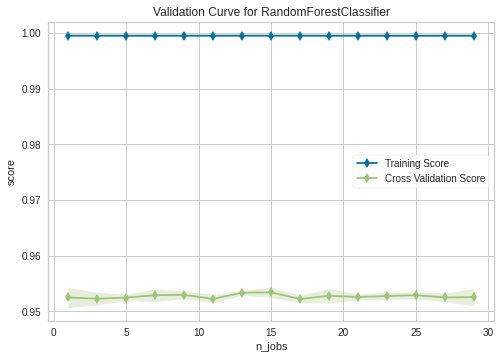

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_jobs",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()


# Feature Importances

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3, max_features=8, n_jobs=8, n_estimators=25)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9509079391891891

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


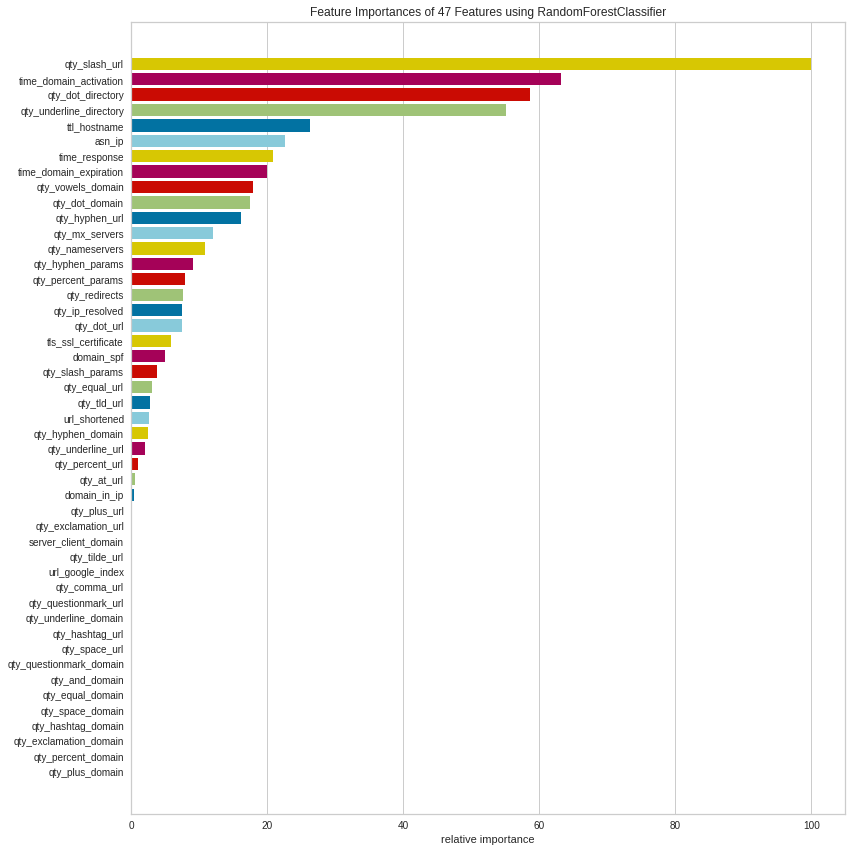

In [ ]:
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc)
viz.fit(X, y)
viz.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


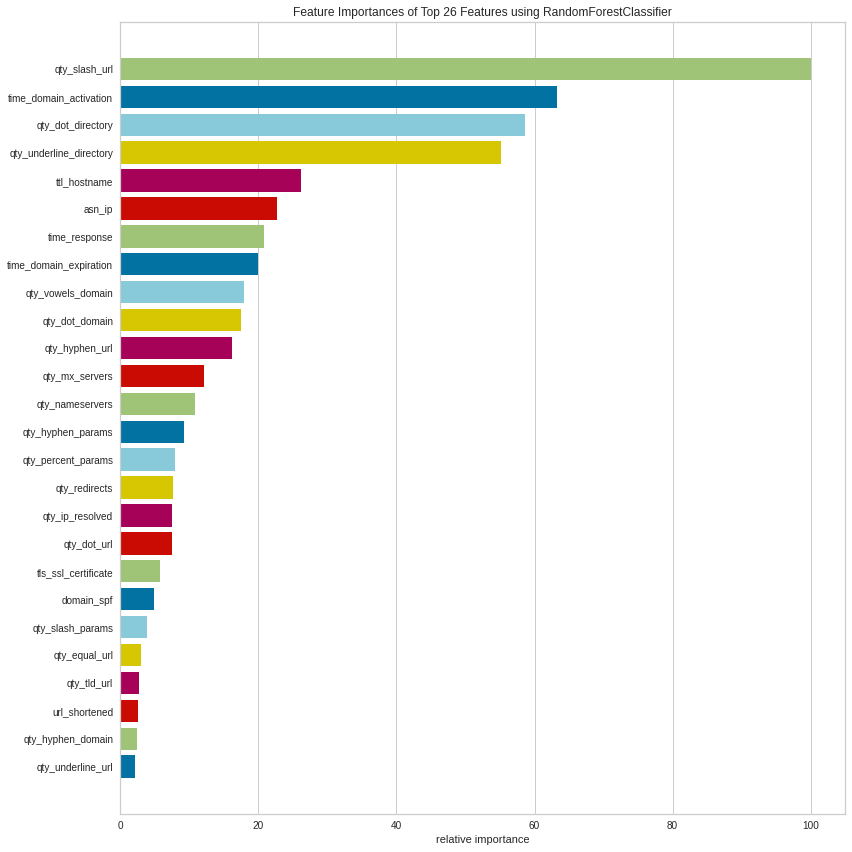

In [ ]:
plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc, topn=26)
viz.fit(X, y)
viz.show()

In [ ]:
len(viz.features_)

26

In [ ]:
X_train = X_train[viz.features_]
X_test = X_test[viz.features_]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9532305743243243

# Class Prediction Error

In [ ]:
import warnings
warnings.simplefilter("ignore")

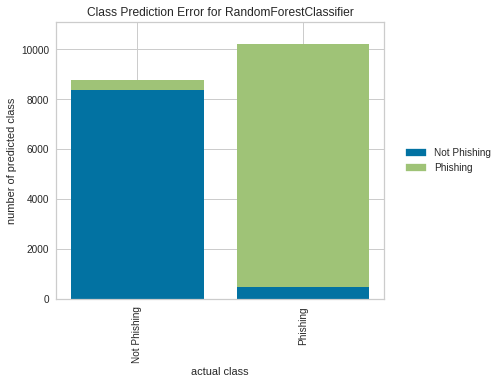

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

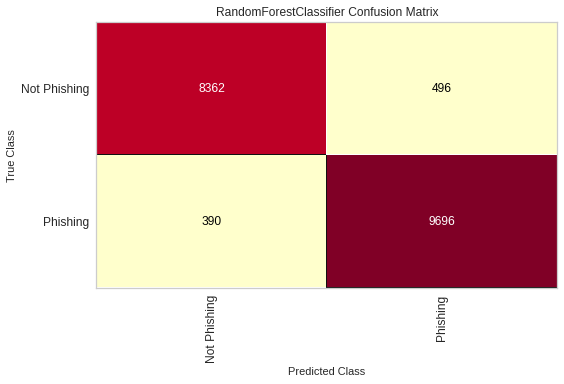

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
cm.score(X_test, y_test)
cm.show()
plt.show()

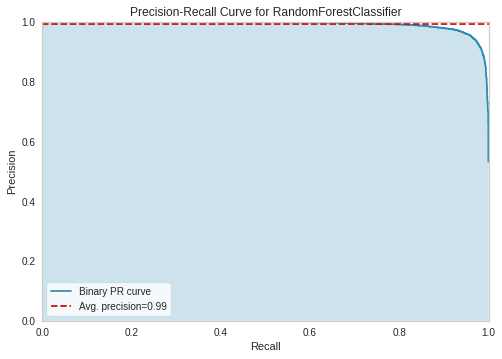

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(rfc)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

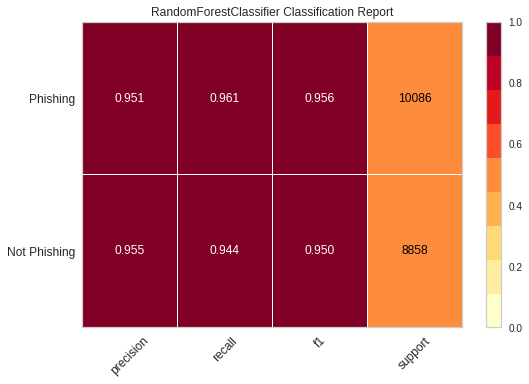

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'}, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

In [ ]:
X_train.columns

Index(['qty_underline_url', 'qty_hyphen_domain', 'url_shortened',
       'qty_tld_url', 'qty_equal_url', 'qty_slash_params', 'domain_spf',
       'tls_ssl_certificate', 'qty_dot_url', 'qty_ip_resolved',
       'qty_redirects', 'qty_percent_params', 'qty_hyphen_params',
       'qty_nameservers', 'qty_mx_servers', 'qty_hyphen_url', 'qty_dot_domain',
       'qty_vowels_domain', 'time_domain_expiration', 'time_response',
       'asn_ip', 'ttl_hostname', 'qty_underline_directory',
       'qty_dot_directory', 'time_domain_activation', 'qty_slash_url'],
      dtype='object')

In [ ]:
X_train.head()

,qty_underline_url,qty_hyphen_domain,url_shortened,qty_tld_url,qty_equal_url,qty_slash_params,domain_spf,tls_ssl_certificate,qty_dot_url,qty_ip_resolved,...,qty_dot_domain,qty_vowels_domain,time_domain_expiration,time_response,asn_ip,ttl_hostname,qty_underline_directory,qty_dot_directory,time_domain_activation,qty_slash_url
2124,0,0,0,1,0,-1,0,1,2,1,...,1,3,6,0.441785,46945,9237,0,1,5106,1
17585,0,0,0,1,0,-1,0,0,2,1,...,1,8,132,0.180759,198610,590,0,1,1693,3
29045,0,0,0,1,0,-1,0,1,2,1,...,1,9,175,1.817275,47869,14390,0,1,189,8
7456,0,0,0,1,0,-1,0,0,2,-1,...,2,2,-1,-1.000000,-1,-1,-1,-1,-1,0
21103,0,0,0,1,0,-1,0,1,2,1,...,2,4,709,0.182070,15169,54,0,0,7690,2


# Solution:
A labeled public dataset from the Mendaly Data comprised of features of 58,645 website is used for prediction. Clasification is done with Random Forest Classification Algorithm gives 95% accuracy.